<a href="https://colab.research.google.com/github/renzotaco/IOIII/blob/main/DistanciaMinima19N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ortools

     |████████████████████████████████| 14.4 MB 99 kB/s 


In [2]:
# Importar la librería de Google OR-Tools
from __future__ import print_function
from ortools.graph import pywrapgraph

In [ ]:
nodos_fuente  = [ 0, 0, 0, 1, 1, 2, 2, 3, 4, 4, 5, 5, 6]
nodos_destino = [ 1, 2, 3, 6, 7, 3, 4, 6, 2, 5, 4, 6, 7]
capacidades   = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
distancia     = [ 599, 180, 497, 420, 691, 432, 100, 345, 100, 138, 138, 526, 440]

suministros = [1, 0, 0, 0, 0, 0, 0, -1]

In [ ]:
nodos_fuente  = [ 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8]
nodos_destino = [ 1, 2, 3, 0, 6, 7, 0, 3, 4, 0, 2, 6, 2, 5, 4, 6, 1, 3, 5, 7, 1, 6, 8, 7]
capacidades   = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
distancia     = [ 599, 180, 497, 599, 420, 691, 180, 432, 100, 497, 432, 345, 100, 138, 138, 526, 420, 345, 526, 440, 691, 440, 102, 102]
suministros   = [1, 0, 0, 0, 0, 0, 0, 0, -1]

In [ ]:
#11 nodos
nodos_fuente  = [ 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 4, 6, 9,10]
nodos_destino = [ 1, 2, 3, 0, 6, 7, 0, 3, 4, 0, 2, 6, 2, 5, 4, 6, 1, 3, 5, 7, 1, 6, 8, 7, 9,10, 4, 6]
capacidades   = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
distancia     = [ 599, 180, 497, 599, 420, 691, 180, 432, 100, 497, 432, 345, 100, 138, 138, 526, 420, 345, 526, 440, 691, 440, 102, 102, 291, 432, 291, 432]
suministros   = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]


In [6]:
nodos_fuente  = [0,0,0,1,1,2,2,3,4,4,5,6,6,6,7,8,9,9,10,10,10,11,11,12,12,12,13,15,16,17]
nodos_destino = [1,2,3,6,7,3,4,6,5,9,6,7,10,11,8,11,10,12,13,15,14,14,18,13,15,16,14,18,17,18]
distancia     = [599,180,497,420,691,432,100,345,138,291,526,440,432,621,102,452,280,114,155,207,108,469,100,100,386,118,207,403,425,314]
capacidades   = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
suministros = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1]

In [7]:
# Crea una instancia para el solucionador
min_cost_flow = pywrapgraph.SimpleMinCostFlow()

# Define cada arco del problema
for i in range(0, len(nodos_fuente)):
  min_cost_flow.AddArcWithCapacityAndUnitCost(nodos_fuente[i], nodos_destino[i],
                                              capacidades[i], distancia[i])

# Define los suministros para cada nodo.
for i in range(0, len(suministros)):
  min_cost_flow.SetNodeSupply(i, suministros[i])

# Encuentra el costo mínimo entre el nodo 0 y el nodo 8
if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
  print('Distancia mínima:', min_cost_flow.OptimalCost())
  print('')
  print(' Arco Flujo / Capacidad Distancia')
  for i in range(min_cost_flow.NumArcs()):
    cost = min_cost_flow.Flow(i) * min_cost_flow.UnitCost(i)
    print('%1s -> %1s %3s / %3s %3s' % (
        min_cost_flow.Tail(i),
        min_cost_flow.Head(i),
        min_cost_flow.Flow(i),
        min_cost_flow.Capacity(i),
        cost))
else:
  print('Hubo un problema con la entrada de flujo de distancia mínima.')

Distancia mínima: 1461

 Arco Flujo / Capacidad Distancia
0 -> 1   0 /   1   0
0 -> 2   1 /   1 180
0 -> 3   0 /   1   0
1 -> 6   0 /   1   0
1 -> 7   0 /   1   0
2 -> 3   0 /   1   0
2 -> 4   1 /   1 100
3 -> 6   0 /   1   0
4 -> 5   0 /   1   0
4 -> 9   1 /   1 291
5 -> 6   0 /   1   0
6 -> 7   0 /   1   0
6 -> 10   0 /   1   0
6 -> 11   0 /   1   0
7 -> 8   0 /   1   0
8 -> 11   0 /   1   0
9 -> 10   1 /   1 280
9 -> 12   0 /   1   0
10 -> 13   0 /   1   0
10 -> 15   1 /   1 207
10 -> 14   0 /   1   0
11 -> 14   0 /   1   0
11 -> 18   0 /   1   0
12 -> 13   0 /   1   0
12 -> 15   0 /   1   0
12 -> 16   0 /   1   0
13 -> 14   0 /   1   0
15 -> 18   1 /   1 403
16 -> 17   0 /   1   0
17 -> 18   0 /   1   0


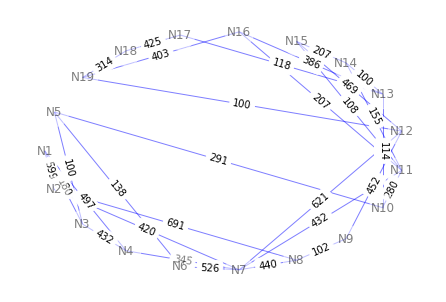

Ingrese nodo de inicio y nodo final separado por espacio:N1 N19
Ruta del nodo N1 a N19: ['N1', 'N3', 'N5', 'N10', 'N11', 'N16', 'N19']
La distancia desde el nodo N1 a N19 es: 1461


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#Definir el número de nodos
nodes=np.array(["N1","N2","N3","N4","N5"])
#Definir la distancia entre nodos
row=np.array(["N1","N1","N1","N2","N2","N2","N3","N3","N3","N3","N4","N4","N4","N5","N5","N5"])
col=np.array(["N2","N3","N4","N1","N3","N5","N1","N2","N4","N5","N1","N3","N5","N3","N4","N2"])
value=np.array([2,1,4,2,6,3,1,6,3,8,4,3,7,8,7,3])

#Definir el número de nodos
nodes=np.array(["N1","N2","N3","N4","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16","N17","N18","N19"])
row=np.array(["N1","N1","N1","N2","N2","N3","N3","N4","N5","N5","N6","N7","N7","N7","N8","N9","N10","N10","N11","N11","N11","N12","N12","N13","N13","N13","N14","N16","N17","N18"])
col=np.array(["N2","N3","N4","N7","N8","N4","N5","N7","N6","N10","N7","N8","N11","N12","N9","N12","N11","N13","N14","N16","N15","N15","N19","N14","N16","N17","N15","N19","N18","N19"])
value=np.array([599,180,497,420,691,432,100,345,138,291,526,440,432,621,102,452,280,114,155,207,108,469,100,100,386,118,207,403,425,314])

#Generar gráfico no dirigido
G=nx.Graph()
# Añadir un nodo al gráfico
for i in range(0,np.size(nodes)):
    G.add_node(nodes[i])
# Añadir bordes ponderados
for i in range(0,np.size(row)):
    G.add_weighted_edges_from([(row[i],col[i],value[i])])
# Establecer diseño de red
pos=nx.shell_layout(G)
# Dibuja una imagen de red
nx.draw(G,pos,with_labels=True, node_color='white', edge_color='b', node_size=800, alpha=0.5)
# plt.ion () # Activa el modo interactivo
# plt.title("slfe_Net")
# plt.ioff()
# plt.show()
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.draw()
plt.pause(1)# Segundos de intervalo: 3s
plt.close()

'''
Shortest Path with dijkstra_path
'''
#dijkstra método para encontrar el camino más corto
start,end=input("Ingrese nodo de inicio y nodo final separado por espacio:").split()
path=nx.dijkstra_path(G, source=start, target=end)
print('Ruta del nodo {0} a {1}:'.format(start,end), path)
distance=nx.dijkstra_path_length(G, source=start, target=end)
print('La distancia desde el nodo {0} a {1} es:'.format(start,end), distance)